In [413]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm

In [414]:
pwd

' '

In [415]:
os.getcwd()

' '

In [416]:
#read in all data
os.chdir('/Users/prachidalal/Downloads')
lr = pd.read_csv('boxOffice.csv')
lr

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19167085,0,0,0,28.00000,19.83000,0,0,1,0,0,7860.50000,10,144,0.49000
1,63106589,0,1,0,150.00000,32.69000,1,0,0,1,0,5737.00000,59,468,0.79000
2,5401605,0,0,0,37.40000,15.69000,0,0,1,0,0,850.00000,24,198,0.36000
3,67528882,0,0,1,200.00000,23.62000,1,1,0,0,0,15326.00000,93,1778,0.76000
4,26223128,0,1,0,150.00000,19.02000,0,0,0,1,0,4574.25000,30,1109,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.00000,34.86000,0,0,0,1,0,9085.50000,68,647,0.70000
58,5329240,0,0,1,22.00000,4.25000,0,1,0,0,0,3186.00000,94,39,0.62000
59,23004765,0,0,1,16.70000,5.96000,0,0,0,0,1,17584.00000,58,122,0.53000
60,70950500,0,0,1,85.00000,16.62000,1,1,0,0,0,10609.66667,594,849,0.71000


array([[<AxesSubplot:title={'center':'box'}>]], dtype=object)

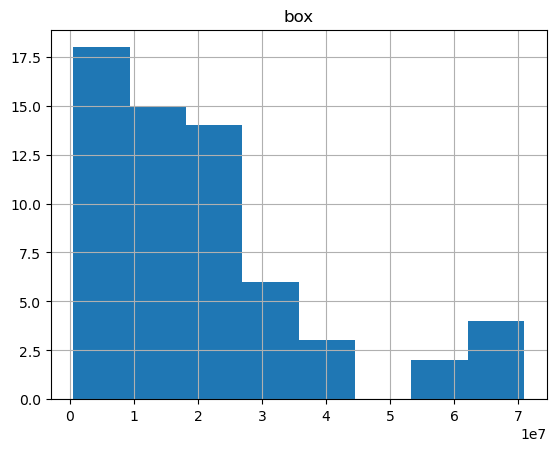

In [417]:
#QUESTION 1 
#histogram of box
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lr.hist(column='box', bins = 8)

In [418]:
#skewedness of box variable
lr['box'].skew()

1.4740564718225797

Skewness is -0.6946390196517153


<AxesSubplot:xlabel='box', ylabel='Count'>

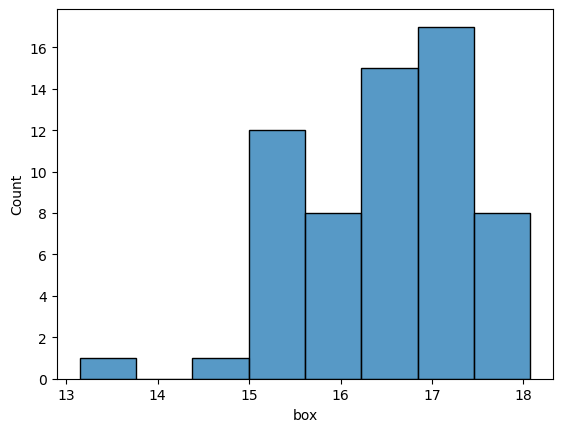

In [419]:
#log transformation on box variable with new skewedness
boxSkewed = np.log(lr['box'])
print ('Skewness is', boxSkewed.skew())
sns.histplot(boxSkewed)

array([[<AxesSubplot:title={'center':'budget'}>]], dtype=object)

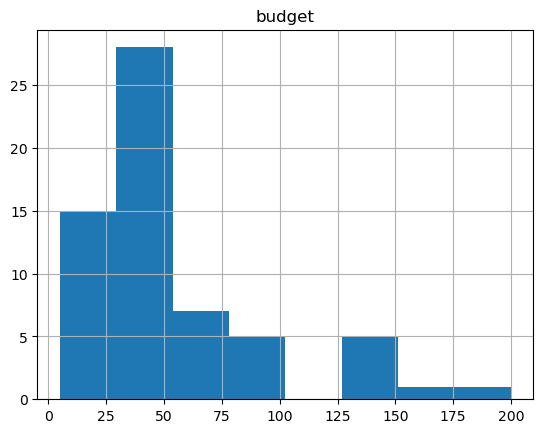

In [420]:
#histogram of budget 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lr.hist(column='budget', bins = 8)

In [18]:
#skewedness of budget variable
lr['budget'].skew()

1.7946894204346953

Skewness is -0.013722750015032979


<AxesSubplot:xlabel='budget', ylabel='Count'>

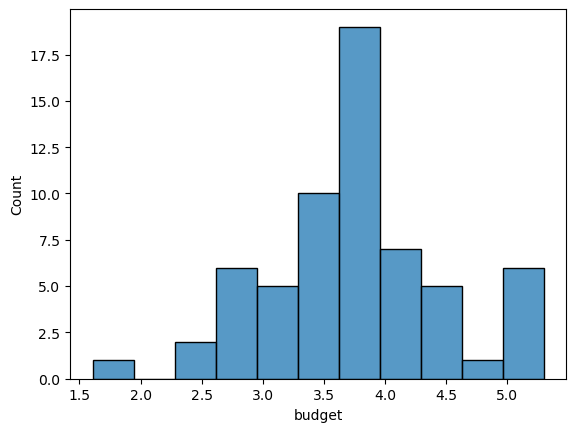

In [19]:
#applying log transformation to budget & new skewedness
budgetSkewed = np.log(lr['budget'])
print ('Skewness is', budgetSkewed.skew())
sns.histplot(budgetSkewed)

array([[<AxesSubplot:title={'center':'starpowr'}>]], dtype=object)

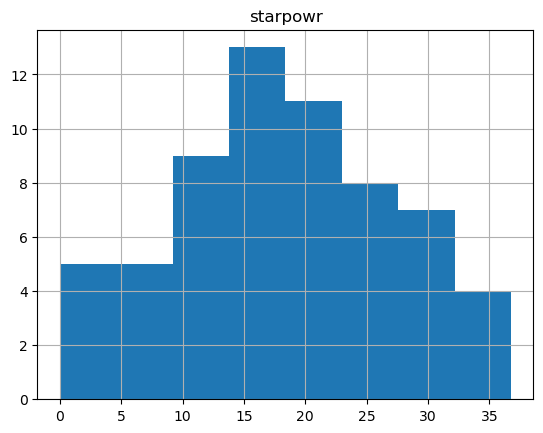

In [421]:
#histogram of starpowr, do not need to apply log transformation 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lr.hist(column='starpowr', bins = 8)

In [422]:
#skewedness of starpowr
lr['starpowr'].skew()

-0.06743290486572177

In [423]:
#QUESTION 2
#combining dataset with skewed variables to make complete dataframe to run linear regression on 
x = lr.copy()
x = x.drop(['box', 'addict', 'cmngsoon', 'fandango','cntwait3','budget'], axis = 1)
x

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror
0,0,0,0,19.83000,0,0,1,0,0
1,0,1,0,32.69000,1,0,0,1,0
2,0,0,0,15.69000,0,0,1,0,0
3,0,0,1,23.62000,1,1,0,0,0
4,0,1,0,19.02000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
57,0,1,0,34.86000,0,0,0,1,0
58,0,0,1,4.25000,0,1,0,0,0
59,0,0,1,5.96000,0,0,0,0,1
60,0,0,1,16.62000,1,1,0,0,0


In [424]:
#combining dataset with skewed variables to make complete dataframe to run linear regression on 
tradReg = pd.merge(x,budgetSkewed,left_index = True, right_index = True)
print(tradReg)

    G  PG  PG13  starpowr  sequel  action  comedy  animated  horror  budget
0   0   0     0  19.83000       0       0       1         0       0 3.33220
1   0   1     0  32.69000       1       0       0         1       0 5.01064
2   0   0     0  15.69000       0       0       1         0       0 3.62167
3   0   0     1  23.62000       1       1       0         0       0 5.29832
4   0   1     0  19.02000       0       0       0         1       0 5.01064
.. ..  ..   ...       ...     ...     ...     ...       ...     ...     ...
57  0   1     0  34.86000       0       0       0         1       0 5.16479
58  0   0     1   4.25000       0       1       0         0       0 3.09104
59  0   0     1   5.96000       0       0       0         0       1 2.81541
60  0   0     1  16.62000       1       1       0         0       0 4.44265
61  0   0     0  16.09000       0       0       1         0       0 2.30259

[62 rows x 10 columns]


In [425]:
#adding constant for linear regression
tradReg1 = tradReg.copy()
tradReg1 = sm.add_constant(tradReg1)

In [426]:
#linear regression on all variables (transformed)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
tradReg1Sum = sm.OLS(boxSkewed, tradReg1).fit()
print(tradReg1Sum.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Sun, 12 Feb 2023   Prob (F-statistic):             0.0109
Time:                        18:06:37   Log-Likelihood:                -70.832
No. Observations:                  62   AIC:                             163.7
Df Residuals:                      51   BIC:                             187.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5768      0.688     19.727      0.0

In [429]:
#correlation matrix of all traditional variables 
#with transformed variables, without buzz variables, without dependent variable
tradReg.corr()

,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,budget
G,1.00000,-0.10314,-0.16568,-0.05551,-0.07524,-0.09860,0.06929,0.24901,-0.05976,0.03624
PG,-0.10314,1.00000,-0.51267,0.24249,-0.01897,-0.12495,0.25470,0.45202,-0.18492,0.21528
PG13,-0.16568,-0.51267,1.00000,0.08938,-0.00594,0.20754,-0.21023,-0.29704,0.03183,0.07792
starpowr,-0.05551,0.24249,0.08938,1.00000,-0.09391,-0.05269,0.05240,0.24926,-0.37073,0.56835
sequel,-0.07524,-0.01897,-0.00594,-0.09391,1.00000,0.32499,-0.08847,0.01998,0.01998,0.14627
action,-0.09860,-0.12495,0.20754,-0.05269,0.32499,1.00000,-0.37268,-0.17678,-0.17678,0.25536
comedy,0.06929,0.25470,-0.21023,0.05240,-0.08847,-0.37268,1.00000,-0.22588,-0.22588,-0.12412
animated,0.24901,0.45202,-0.29704,0.24926,0.01998,-0.17678,-0.22588,1.00000,-0.10714,0.32007
horror,-0.05976,-0.18492,0.03183,-0.37073,0.01998,-0.17678,-0.22588,-0.10714,1.00000,-0.40924
budget,0.03624,0.21528,0.07792,0.56835,0.14627,0.25536,-0.12412,0.32007,-0.40924,1.00000


In [430]:
#QUESTION 3
#dataframe of significant variables
tradReg2 = tradReg1.copy()
tradReg2 = tradReg2.drop(['G', 'PG', 'PG13', 'starpowr','action', 'comedy','animated'], axis = 1)
tradReg2

,const,sequel,horror,budget
0,1.00000,0,0,3.33220
1,1.00000,1,0,5.01064
2,1.00000,0,0,3.62167
3,1.00000,1,0,5.29832
4,1.00000,0,0,5.01064
...,...,...,...,...
57,1.00000,0,0,5.16479
58,1.00000,0,0,3.09104
59,1.00000,0,1,2.81541
60,1.00000,1,0,4.44265


In [431]:
#linear regression on significant variables
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sigregr = sm.OLS(boxSkewed, tradReg2).fit()
print(sigregr.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           0.000162
Time:                        18:10:02   Log-Likelihood:                -73.175
No. Observations:                  62   AIC:                             154.4
Df Residuals:                      58   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8718      0.611     22.700      0.0

3.317153660492401

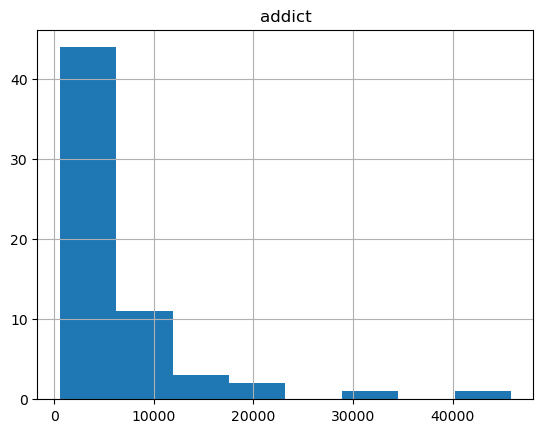

In [31]:
#QUESTION 4
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lr.hist(column='addict', bins = 8)
lr['addict'].skew()

Skewness is 0.3310231486342384


<AxesSubplot:xlabel='addict', ylabel='Count'>

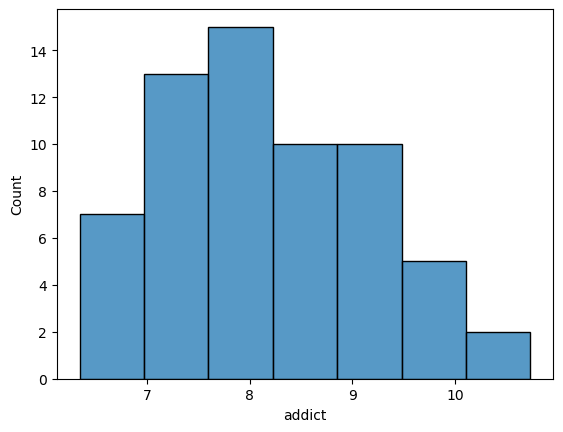

In [32]:
addictSkewed = np.log(lr['addict'])
print ('Skewness is', addictSkewed.skew())
sns.histplot(addictSkewed)

2.852279136196298

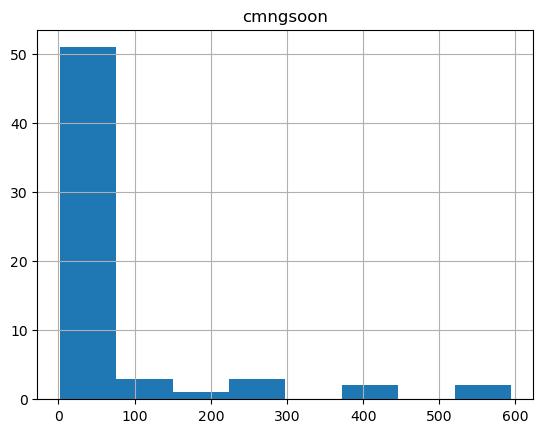

In [33]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lr.hist(column='cmngsoon', bins = 8)
lr['cmngsoon'].skew()

Skewness is 0.23785659802955925


<AxesSubplot:xlabel='cmngsoon', ylabel='Count'>

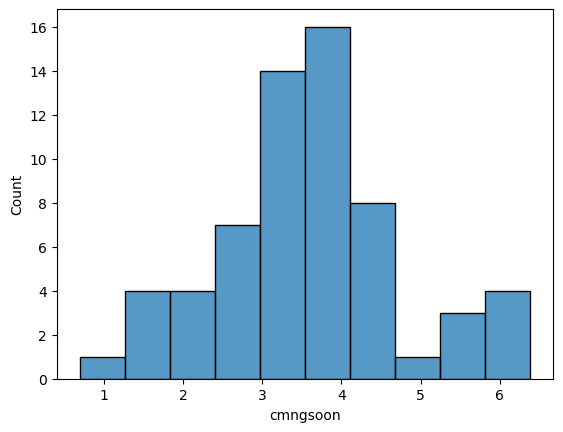

In [34]:
cmngsoonSkewed = np.log(lr['cmngsoon'])
print ('Skewness is', cmngsoonSkewed.skew())
sns.histplot(cmngsoonSkewed)

1.403301611291732

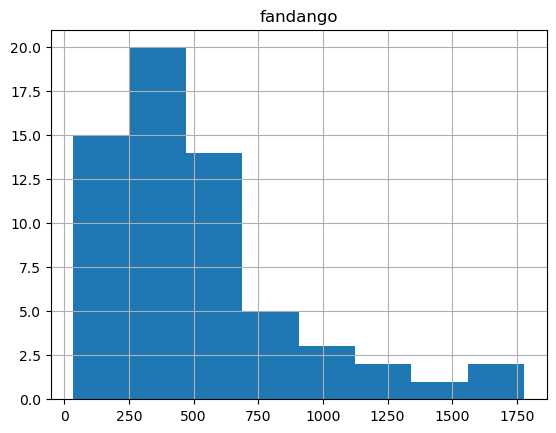

In [35]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lr.hist(column='fandango', bins = 8)
lr['fandango'].skew()

Skewness is -0.8509308409971035


<AxesSubplot:xlabel='fandango', ylabel='Count'>

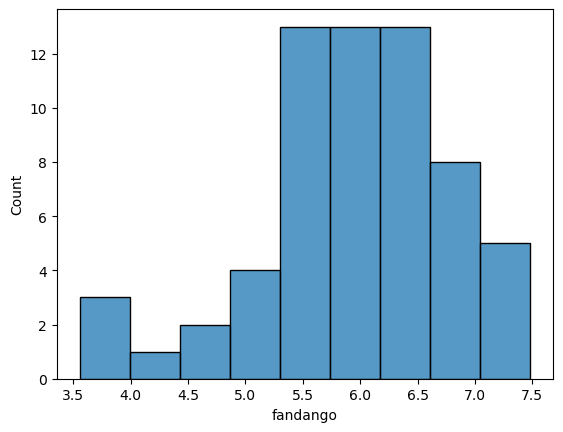

In [36]:
fandangoSkewed = np.log(lr['fandango'])
print ('Skewness is', fandangoSkewed.skew())
sns.histplot(fandangoSkewed)

-0.028591728433031986

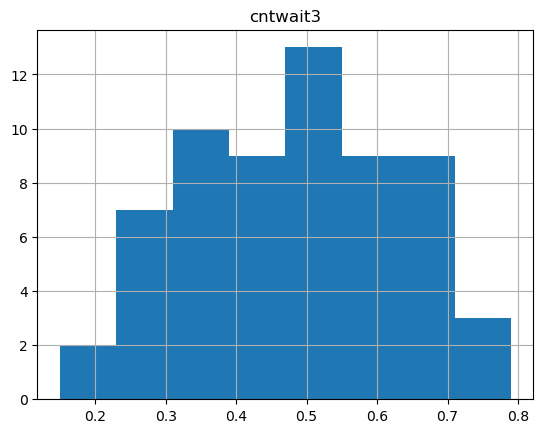

In [37]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lr.hist(column='cntwait3', bins = 8)
lr['cntwait3'].skew()

In [247]:
#QUESTION 5
#making a dataframe with all variables (including buzz & all transformed variables)
xAllVars = pd.merge(tradReg1,addictSkewed,left_index = True, right_index = True)
print(xAllVars)

     const  G  PG  PG13  starpowr  sequel  action  comedy  animated  horror  \
0  1.00000  0   0     0  19.83000       0       0       1         0       0   
1  1.00000  0   1     0  32.69000       1       0       0         1       0   
2  1.00000  0   0     0  15.69000       0       0       1         0       0   
3  1.00000  0   0     1  23.62000       1       1       0         0       0   
4  1.00000  0   1     0  19.02000       0       0       0         1       0   
..     ... ..  ..   ...       ...     ...     ...     ...       ...     ...   
57 1.00000  0   1     0  34.86000       0       0       0         1       0   
58 1.00000  0   0     1   4.25000       0       1       0         0       0   
59 1.00000  0   0     1   5.96000       0       0       0         0       1   
60 1.00000  0   0     1  16.62000       1       1       0         0       0   
61 1.00000  0   0     0  16.09000       0       0       1         0       0   

    budget  addict  
0  3.33220 8.96961  
1  5.0106

In [248]:
#making a dataframe with all variables (including buzz & all transformed variables)
xAllVars1 = pd.merge(xAllVars,cmngsoonSkewed,left_index = True, right_index = True)
print(xAllVars1)

     const  G  PG  PG13  starpowr  sequel  action  comedy  animated  horror  \
0  1.00000  0   0     0  19.83000       0       0       1         0       0   
1  1.00000  0   1     0  32.69000       1       0       0         1       0   
2  1.00000  0   0     0  15.69000       0       0       1         0       0   
3  1.00000  0   0     1  23.62000       1       1       0         0       0   
4  1.00000  0   1     0  19.02000       0       0       0         1       0   
..     ... ..  ..   ...       ...     ...     ...     ...       ...     ...   
57 1.00000  0   1     0  34.86000       0       0       0         1       0   
58 1.00000  0   0     1   4.25000       0       1       0         0       0   
59 1.00000  0   0     1   5.96000       0       0       0         0       1   
60 1.00000  0   0     1  16.62000       1       1       0         0       0   
61 1.00000  0   0     0  16.09000       0       0       1         0       0   

    budget  addict  cmngsoon  
0  3.33220 8.96961  

In [250]:
#making a dataframe with all variables (including buzz & all transformed variables)
xAllVars2 = pd.merge(xAllVars1,fandangoSkewed,left_index = True, right_index = True)
print(xAllVars2)

     const  G  PG  PG13  starpowr  sequel  action  comedy  animated  horror  \
0  1.00000  0   0     0  19.83000       0       0       1         0       0   
1  1.00000  0   1     0  32.69000       1       0       0         1       0   
2  1.00000  0   0     0  15.69000       0       0       1         0       0   
3  1.00000  0   0     1  23.62000       1       1       0         0       0   
4  1.00000  0   1     0  19.02000       0       0       0         1       0   
..     ... ..  ..   ...       ...     ...     ...     ...       ...     ...   
57 1.00000  0   1     0  34.86000       0       0       0         1       0   
58 1.00000  0   0     1   4.25000       0       1       0         0       0   
59 1.00000  0   0     1   5.96000       0       0       0         0       1   
60 1.00000  0   0     1  16.62000       1       1       0         0       0   
61 1.00000  0   0     0  16.09000       0       0       1         0       0   

    budget  addict  cmngsoon  fandango  
0  3.33220

In [252]:
#making a dataframe with all variables (including buzz & all transformed variables)
xAllVars3 = pd.merge(xAllVars2,lr['cntwait3'],left_index = True, right_index = True)
print(xAllVars3)

     const  G  PG  PG13  starpowr  sequel  action  comedy  animated  horror  \
0  1.00000  0   0     0  19.83000       0       0       1         0       0   
1  1.00000  0   1     0  32.69000       1       0       0         1       0   
2  1.00000  0   0     0  15.69000       0       0       1         0       0   
3  1.00000  0   0     1  23.62000       1       1       0         0       0   
4  1.00000  0   1     0  19.02000       0       0       0         1       0   
..     ... ..  ..   ...       ...     ...     ...     ...       ...     ...   
57 1.00000  0   1     0  34.86000       0       0       0         1       0   
58 1.00000  0   0     1   4.25000       0       1       0         0       0   
59 1.00000  0   0     1   5.96000       0       0       0         0       1   
60 1.00000  0   0     1  16.62000       1       1       0         0       0   
61 1.00000  0   0     0  16.09000       0       0       1         0       0   

    budget  addict  cmngsoon  fandango  cntwait3  


In [332]:
#linear regression on all variables (including buzz & all transformed variables)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
linregrAllVars = sm.OLS(boxSkewed, xAllVars3).fit()
print(linregrAllVars.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.77e-06
Time:                        11:24:59   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4958      0.993     11.581      0.0

In [337]:
#QUESTION 6
#making a dataframe with only significant variables 
xAllVars4 = xAllVars3.copy()
xAllVars4 = xAllVars4.drop(['G', 'sequel','PG13', 'starpowr', 'comedy', 'horror','budget','cmngsoon','fandango'], axis = 1)
xAllVars4 

,const,PG,action,animated,addict,cntwait3
0,1.00000,0,0,0,8.96961,0.49000
1,1.00000,1,0,1,8.65469,0.79000
2,1.00000,0,0,0,6.74524,0.36000
3,1.00000,0,1,0,9.63731,0.76000
4,1.00000,1,0,1,8.42820,0.53000
...,...,...,...,...,...,...
57,1.00000,1,0,1,9.11444,0.70000
58,1.00000,0,1,0,8.06652,0.62000
59,1.00000,0,0,0,9.77474,0.53000
60,1.00000,0,1,0,9.26952,0.71000


In [412]:
#linear regression with significant variables 
linregrSigVars = sm.OLS(boxSkewed, xAllVars4).fit()
print(linregrSigVars.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           6.06e-09
Time:                        15:11:22   Log-Likelihood:                -58.512
No. Observations:                  62   AIC:                             129.0
Df Residuals:                      56   BIC:                             141.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5048      0.751     16.644      0.0

In [106]:
#QUESTION 8
d1 = pd.DataFrame(addictSkewed)
d1

,addict
0,8.96961
1,8.65469
2,6.74524
3,9.63731
4,8.42820
...,...
57,9.11444
58,8.06652
59,9.77474
60,9.26952


In [105]:
d2 = pd.DataFrame(cmngsoonSkewed)
d2

,cmngsoon
0,2.30259
1,4.07754
2,3.17805
3,4.53260
4,3.40120
...,...
57,4.21951
58,4.54329
59,4.06044
60,6.38688


In [108]:
d3 = pd.DataFrame(lr['cntwait3'])
d3

,cntwait3
0,0.49000
1,0.79000
2,0.36000
3,0.76000
4,0.53000
...,...
57,0.70000
58,0.62000
59,0.53000
60,0.71000


In [113]:
d4 = pd.DataFrame(fandangoSkewed)
d4

,fandango
0,4.96981
1,6.14847
2,5.28827
3,7.48324
4,7.01121
...,...
57,6.47235
58,3.66356
59,4.80402
60,6.74406


In [115]:
d5 = pd.DataFrame(lr['box'])
d5

,box
0,19167085
1,63106589
2,5401605
3,67528882
4,26223128
...,...
57,59321095
58,5329240
59,23004765
60,70950500


In [111]:
data = pd.merge(d1,d2, left_index = True, right_index = True)
print(data)

    addict  cmngsoon
0  8.96961   2.30259
1  8.65469   4.07754
2  6.74524   3.17805
3  9.63731   4.53260
4  8.42820   3.40120
..     ...       ...
57 9.11444   4.21951
58 8.06652   4.54329
59 9.77474   4.06044
60 9.26952   6.38688
61 8.95682   3.09104

[62 rows x 2 columns]


In [112]:
data1 = pd.merge(data, d3, left_index = True, right_index = True)
print(data1)

    addict  cmngsoon  cntwait3
0  8.96961   2.30259   0.49000
1  8.65469   4.07754   0.79000
2  6.74524   3.17805   0.36000
3  9.63731   4.53260   0.76000
4  8.42820   3.40120   0.53000
..     ...       ...       ...
57 9.11444   4.21951   0.70000
58 8.06652   4.54329   0.62000
59 9.77474   4.06044   0.53000
60 9.26952   6.38688   0.71000
61 8.95682   3.09104   0.47000

[62 rows x 3 columns]


In [114]:
#dataframe with all transformed variables 
data2 = pd.merge(data1,lr['st',left_index = True, right_index = True)
print(data2)

    addict  cmngsoon  cntwait3  fandango
0  8.96961   2.30259   0.49000   4.96981
1  8.65469   4.07754   0.79000   6.14847
2  6.74524   3.17805   0.36000   5.28827
3  9.63731   4.53260   0.76000   7.48324
4  8.42820   3.40120   0.53000   7.01121
..     ...       ...       ...       ...
57 9.11444   4.21951   0.70000   6.47235
58 8.06652   4.54329   0.62000   3.66356
59 9.77474   4.06044   0.53000   4.80402
60 9.26952   6.38688   0.71000   6.74406
61 8.95682   3.09104   0.47000   5.66296

[62 rows x 4 columns]


In [433]:
#standardizing the data
data2std = (data2 - data2.mean())/data2.std()
data2std

,addict,cmngsoon,cntwait3,fandango
0,0.80375,-1.09031,0.04840,-1.14189
1,0.48741,0.39389,1.96372,0.22059
2,-1.43068,-0.35825,-0.78158,-0.77377
3,1.47448,0.77441,1.77219,1.76355
4,0.25990,-0.17166,0.30377,1.21790
...,...,...,...,...
57,0.94924,0.51260,1.38913,0.59498
58,-0.10342,0.78335,0.87837,-2.65187
59,1.61254,0.37959,0.30377,-1.33354
60,1.10503,2.32493,1.45297,0.90907


In [210]:
#covariance matrix of standardized data
covstd = pd.DataFrame.cov(data2std)
covstd

,addict,cmngsoon,cntwait3,fandango
addict,1.00000,0.58183,0.55017,0.27777
cmngsoon,0.58183,1.00000,0.63795,0.35032
cntwait3,0.55017,0.63795,1.00000,0.36475
fandango,0.27777,0.35032,0.36475,1.00000


In [211]:
#correlation matrix of original data which is the same as covariance matrix of standardized data
corr = pd.DataFrame.corr(data2)
corr

,addict,cmngsoon,cntwait3,fandango
addict,1.00000,0.58183,0.55017,0.27777
cmngsoon,0.58183,1.00000,0.63795,0.35032
cntwait3,0.55017,0.63795,1.00000,0.36475
fandango,0.27777,0.35032,0.36475,1.00000


In [212]:
#eigen values
evals, evecs = eigh(corr)
evals

array([0.3584513 , 0.45214886, 0.77519959, 2.41420026])

In [213]:
#eigen vectors
evecs

array([[-0.15390517, -0.77445054, -0.33932725, -0.51126957],
       [ 0.76106365,  0.29212109, -0.18491386, -0.54886633],
       [-0.63008666,  0.5397516 , -0.1270135 , -0.54362357],
       [ 0.00927995, -0.15349213,  0.91352693, -0.37659341]])

In [256]:
#sorting the evals and evecs
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:,idx]

In [215]:
#sorted evals
evals

array([2.41420026, 0.77519959, 0.45214886, 0.3584513 ])

In [216]:
#sorted evecs
evecs

array([[-0.51126957, -0.33932725, -0.77445054, -0.15390517],
       [-0.54886633, -0.18491386,  0.29212109,  0.76106365],
       [-0.54362357, -0.1270135 ,  0.5397516 , -0.63008666],
       [-0.37659341,  0.91352693, -0.15349213,  0.00927995]])

In [217]:
#sum of diaganol elements
np.trace(corr)

4.0

In [218]:
#proporation of variance explained by each component
evalsP = evals/np.trace(corr)
evalsP

array([0.60355006, 0.1937999 , 0.11303721, 0.08961282])

In [219]:
sc = prep.StandardScaler()

In [220]:
#standard scalar python function
seg = pd.DataFrame(sc.fit_transform(data2), columns = data2.columns)
seg

,addict,cmngsoon,cntwait3,fandango
0,0.81032,-1.09921,0.04879,-1.15121
1,0.49139,0.39710,1.97975,0.22239
2,-1.44236,-0.36117,-0.78796,-0.78009
3,1.48651,0.78073,1.78666,1.77794
4,0.26202,-0.17306,0.30625,1.22784
...,...,...,...,...
57,0.95699,0.51679,1.40047,0.59984
58,-0.10426,0.78974,0.88554,-2.67352
59,1.62570,0.38269,0.30625,-1.34443
60,1.11405,2.34391,1.46483,0.91650


In [222]:
sc.scale = np.std(seg, axis=0, ddof=1).to_list()
sc.scale_

[1.0081634007555278, 1.008163400755528, 1.0081634007555278, 1.0081634007555278]

In [224]:
seg = seg/sc.scale_
seg

,addict,cmngsoon,cntwait3,fandango
0,0.79725,-1.08148,0.04801,-1.13265
1,0.48347,0.39070,1.94782,0.21881
2,-1.41910,-0.35535,-0.77525,-0.76751
3,1.46254,0.76814,1.75784,1.74927
4,0.25779,-0.17027,0.30131,1.20803
...,...,...,...,...
57,0.94155,0.50845,1.37788,0.59017
58,-0.10258,0.77701,0.87126,-2.63040
59,1.59948,0.37652,0.30131,-1.32274
60,1.09608,2.30611,1.44120,0.90171


In [259]:
#apply PCA to data
pca2 = PCA().fit(seg)
new_seg = pca2.transform(seg)
new_seg

array([[-5.86428382e-01,  1.11134712e+00, -7.33586073e-01,
         9.86531846e-01],
       [ 1.60290699e+00,  2.83814373e-01,  7.57464410e-01,
         1.00232725e+00],
       [-1.63106068e+00,  5.54222104e-02,  6.94582154e-01,
        -4.29314915e-01],
       [ 2.78372052e+00, -7.36414916e-01, -2.27975915e-01,
         7.31850551e-01],
       [ 6.57085765e-01, -1.00931008e+00, -2.72174462e-01,
         3.47904801e-01],
       [ 3.98518877e+00, -1.41089479e-01, -3.60582145e-01,
        -2.10653456e-01],
       [-3.85850584e-01,  3.89517000e-01, -1.22054433e-01,
         4.35128601e-01],
       [-4.72015442e-01, -4.34065305e-01,  3.59681546e-01,
         1.66989569e+00],
       [ 7.85928777e-01,  3.66461732e-02,  4.79607910e-01,
        -1.50694467e-02],
       [ 1.82492397e+00, -8.54592196e-02,  9.51180553e-01,
        -9.89322325e-01],
       [-2.81954060e+00,  1.86209513e+00, -2.72382370e-02,
        -4.56352419e-01],
       [-3.13865132e+00, -5.42723860e-01, -2.52115139e-03,
      

In [226]:
#explained variance ratio
expldvarpca2 = pca2.explained_variance_ratio_
expldvarpca2

array([0.60355006, 0.1937999 , 0.11303721, 0.08961282])

In [264]:
#explained variance
expldvarpca3 = pca2.explained_variance_
expldvarpca3

array([2.37526155, 0.76269637, 0.44485614, 0.35266982])

In [266]:
egnvalsum = np.cumsum(expldvarpca2)
print('/nCumulative sum of eigenvalues')
print(egnvalsum)

/nCumulative sum of eigenvalues
[0.60355006 0.79734996 0.91038718 1.        ]


In [257]:
#QUESTION 9
#creating a dataframe with traditional variables excluding buzz variables
xAllVars5 = xAllVars3.copy()
xAllVars5 = xAllVars5.drop(['addict', 'cmngsoon', 'cntwait3', 'fandango'], axis = 1)
xAllVars5

,const,G,PG,PG13,starpowr,sequel,action,comedy,animated,horror,budget
0,1.00000,0,0,0,19.83000,0,0,1,0,0,3.33220
1,1.00000,0,1,0,32.69000,1,0,0,1,0,5.01064
2,1.00000,0,0,0,15.69000,0,0,1,0,0,3.62167
3,1.00000,0,0,1,23.62000,1,1,0,0,0,5.29832
4,1.00000,0,1,0,19.02000,0,0,0,1,0,5.01064
...,...,...,...,...,...,...,...,...,...,...,...
57,1.00000,0,1,0,34.86000,0,0,0,1,0,5.16479
58,1.00000,0,0,1,4.25000,0,1,0,0,0,3.09104
59,1.00000,0,0,1,5.96000,0,0,0,0,1,2.81541
60,1.00000,0,0,1,16.62000,1,1,0,0,0,4.44265


In [275]:
#converting PCA series to dataframe
PCAdf = pd.DataFrame(new_seg, columns = ['PC1', 'PC2','PC3','PC4'])
PCAdf

,PC1,PC2,PC3,PC4
0,-0.58643,1.11135,-0.73359,0.98653
1,1.60291,0.28381,0.75746,1.00233
2,-1.63106,0.05542,0.69458,-0.42931
3,2.78372,-0.73641,-0.22798,0.73185
4,0.65709,-1.00931,-0.27217,0.34790
...,...,...,...,...
57,1.73176,0.04939,0.07247,0.62065
58,-0.14293,2.62247,1.18043,-0.03376
59,0.69009,1.85900,-0.76306,0.16174
60,2.94919,0.15767,0.46429,-0.68669


In [276]:
#creating a dataframe with all variables, excluding buzz variables and including PCA
xAllVars6 = pd.merge(xAllVars5,PCAdf,left_index = True, right_index = True)
print(xAllVars6)

     const  G  PG  PG13  starpowr  sequel  action  comedy  animated  horror  \
0  1.00000  0   0     0  19.83000       0       0       1         0       0   
1  1.00000  0   1     0  32.69000       1       0       0         1       0   
2  1.00000  0   0     0  15.69000       0       0       1         0       0   
3  1.00000  0   0     1  23.62000       1       1       0         0       0   
4  1.00000  0   1     0  19.02000       0       0       0         1       0   
..     ... ..  ..   ...       ...     ...     ...     ...       ...     ...   
57 1.00000  0   1     0  34.86000       0       0       0         1       0   
58 1.00000  0   0     1   4.25000       0       1       0         0       0   
59 1.00000  0   0     1   5.96000       0       0       0         0       1   
60 1.00000  0   0     1  16.62000       1       1       0         0       0   
61 1.00000  0   0     0  16.09000       0       0       1         0       0   

    budget      PC1      PC2      PC3      PC4  
0 

In [340]:
#linear regression on all variables, excluding buzz variables and including PCA
pd.set_option('display.float_format', lambda x: '%.5f' % x)
PCAvars = sm.OLS(boxSkewed,xAllVars6).fit()
print(PCAvars.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.77e-06
Time:                        11:51:41   Log-Likelihood:                -53.492
No. Observations:                  62   AIC:                             137.0
Df Residuals:                      47   BIC:                             168.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5293      0.675     22.991      0.0

In [347]:
#QUESTION 10 
#Linear Regression using principle components based on Kaiser's Rule >1 & 60% threshold 
PC1df = PCAdf['PC1'].copy()
PC1df = sm.add_constant(PC1df)
PC1Reg = sm.OLS(boxSkewed,PC1df).fit()
print(PC1Reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     42.15
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.82e-08
Time:                        10:52:53   Log-Likelihood:                -67.334
No. Observations:                  62   AIC:                             138.7
Df Residuals:                      60   BIC:                             142.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.093    178.077      0.0

In [358]:
#linear regression with principle components with “explained variance” thresholds of 70%
PC70df = PCAdf.copy()
PC70df = PC70df.drop(['PC3', 'PC4'], axis = 1)
PC70df1 = PC70df.copy()
PC70df1 = sm.add_constant(PC70df)
PC70reg = sm.OLS(boxSkewed,PC70df1).fit()
print(PC70reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     21.05
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.26e-07
Time:                        11:08:35   Log-Likelihood:                -67.135
No. Observations:                  62   AIC:                             140.3
Df Residuals:                      59   BIC:                             146.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.093    177.156      0.0

In [366]:
#linear regression with principle components with “explained variance” thresholds of 80% & 90%
PC80df = PCAdf.copy()
PC80df = PC80df.drop(['PC4'], axis = 1)
PC80df1 = PC80df.copy()
PC80df1 = sm.add_constant(PC80df)
PC80reg = sm.OLS(boxSkewed,PC80df1).fit()
print(PC80reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           5.96e-07
Time:                        13:27:26   Log-Likelihood:                -67.006
No. Observations:                  62   AIC:                             142.0
Df Residuals:                      58   BIC:                             150.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.3930      0.061      6.417      0.0

In [361]:
PCAdf['const'] = 1
linregPCA = sm.OLS(boxSkewed,PCAdf).fit()
print(linregPCA.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.72e-07
Time:                        11:12:22   Log-Likelihood:                -63.980
No. Observations:                  62   AIC:                             138.0
Df Residuals:                      57   BIC:                             148.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.3930      0.059      6.680      0.0

In [370]:
#QUESTION 11
dfQ12 = pd.merge(data2,budgetSkewed,left_index = True, right_index = True)
print(dfQ12)

    addict  cmngsoon  cntwait3  fandango  budget
0  8.96961   2.30259   0.49000   4.96981 3.33220
1  8.65469   4.07754   0.79000   6.14847 5.01064
2  6.74524   3.17805   0.36000   5.28827 3.62167
3  9.63731   4.53260   0.76000   7.48324 5.29832
4  8.42820   3.40120   0.53000   7.01121 5.01064
..     ...       ...       ...       ...     ...
57 9.11444   4.21951   0.70000   6.47235 5.16479
58 8.06652   4.54329   0.62000   3.66356 3.09104
59 9.77474   4.06044   0.53000   4.80402 2.81541
60 9.26952   6.38688   0.71000   6.74406 4.44265
61 8.95682   3.09104   0.47000   5.66296 2.30259

[62 rows x 5 columns]


In [371]:
#making a dataframe with all 4 buzz variables and other continuous variables
df1Q12 = pd.merge(dfQ12,lr['starpowr'],left_index = True, right_index = True)
print(df1Q12)

    addict  cmngsoon  cntwait3  fandango  budget  starpowr
0  8.96961   2.30259   0.49000   4.96981 3.33220  19.83000
1  8.65469   4.07754   0.79000   6.14847 5.01064  32.69000
2  6.74524   3.17805   0.36000   5.28827 3.62167  15.69000
3  9.63731   4.53260   0.76000   7.48324 5.29832  23.62000
4  8.42820   3.40120   0.53000   7.01121 5.01064  19.02000
..     ...       ...       ...       ...     ...       ...
57 9.11444   4.21951   0.70000   6.47235 5.16479  34.86000
58 8.06652   4.54329   0.62000   3.66356 3.09104   4.25000
59 9.77474   4.06044   0.53000   4.80402 2.81541   5.96000
60 9.26952   6.38688   0.71000   6.74406 4.44265  16.62000
61 8.95682   3.09104   0.47000   5.66296 2.30259  16.09000

[62 rows x 6 columns]


In [372]:
#standardizing the data 
data6std = (df1Q12 - df1Q12.mean())/df1Q12.std()
data6std

,addict,cmngsoon,cntwait3,fandango,budget,starpowr
0,0.80375,-1.09031,0.04840,-1.14189,-0.52539,0.20264
1,0.48741,0.39389,1.96372,0.22059,1.78019,1.65172
2,-1.43068,-0.35825,-0.78158,-0.77377,-0.12777,-0.26386
3,1.47448,0.77441,1.77219,1.76355,2.17536,0.62971
4,0.25990,-0.17166,0.30377,1.21790,1.78019,0.11137
...,...,...,...,...,...,...
57,0.94924,0.51260,1.38913,0.59498,1.99194,1.89624
58,-0.10342,0.78335,0.87837,-2.65187,-0.85667,-1.55293
59,1.61254,0.37959,0.30377,-1.33354,-1.23529,-1.36024
60,1.10503,2.32493,1.45297,0.90907,0.99997,-0.15906


In [373]:
#covariance matrix of standardized data
covstd6 = pd.DataFrame.cov(data6std)
covstd6

,addict,cmngsoon,cntwait3,fandango,budget,starpowr
addict,1.00000,0.58183,0.55017,0.27777,0.24589,-0.02897
cmngsoon,0.58183,1.00000,0.63795,0.35032,0.25087,-0.11485
cntwait3,0.55017,0.63795,1.00000,0.36475,0.55762,0.32558
fandango,0.27777,0.35032,0.36475,1.00000,0.44206,0.24250
budget,0.24589,0.25087,0.55762,0.44206,1.00000,0.56835
starpowr,-0.02897,-0.11485,0.32558,0.24250,0.56835,1.00000


In [389]:
#correlation matrix of original data which is the same as covariance matrix of standardized data
corr6 = pd.DataFrame.corr(df1Q12)
corr6

,addict,cmngsoon,cntwait3,fandango,budget,starpowr
addict,1.00000,0.58183,0.55017,0.27777,0.24589,-0.02897
cmngsoon,0.58183,1.00000,0.63795,0.35032,0.25087,-0.11485
cntwait3,0.55017,0.63795,1.00000,0.36475,0.55762,0.32558
fandango,0.27777,0.35032,0.36475,1.00000,0.44206,0.24250
budget,0.24589,0.25087,0.55762,0.44206,1.00000,0.56835
starpowr,-0.02897,-0.11485,0.32558,0.24250,0.56835,1.00000


In [375]:
#eigen values
evals6, evecs6 = eigh(corr6)
evals6

array([0.2215273 , 0.34049709, 0.44299297, 0.70232212, 1.45442671,
       2.83823382])

In [377]:
#eigen vectors
evecs6

array([[-0.08008871, -0.07914513, -0.79075495,  0.19651156,  0.40376224,
        -0.40048435],
       [-0.5914369 ,  0.16018966,  0.48920846, -0.0031937 ,  0.45426654,
        -0.42290479],
       [ 0.7028336 ,  0.22614273,  0.27819718,  0.32680094,  0.05652287,
        -0.51720116],
       [ 0.13782705,  0.15227696, -0.11412638, -0.88743515, -0.11178511,
        -0.3804649 ],
       [-0.11559798, -0.78223141,  0.11952631,  0.07030385, -0.40782831,
        -0.434969  ],
       [-0.34271552,  0.53090539, -0.1751475 ,  0.24917939, -0.66977854,
        -0.24354716]])

In [378]:
#sorting the evals and evecs
idx7 = evals6.argsort()[::-1]
evals6 = evals6[idx7]
evecs6 = evecs6[:,idx7]

In [379]:
#sorted evals
evals6

array([2.83823382, 1.45442671, 0.70232212, 0.44299297, 0.34049709,
       0.2215273 ])

In [380]:
#sorted evecs
evecs6

array([[-0.40048435,  0.40376224,  0.19651156, -0.79075495, -0.07914513,
        -0.08008871],
       [-0.42290479,  0.45426654, -0.0031937 ,  0.48920846,  0.16018966,
        -0.5914369 ],
       [-0.51720116,  0.05652287,  0.32680094,  0.27819718,  0.22614273,
         0.7028336 ],
       [-0.3804649 , -0.11178511, -0.88743515, -0.11412638,  0.15227696,
         0.13782705],
       [-0.434969  , -0.40782831,  0.07030385,  0.11952631, -0.78223141,
        -0.11559798],
       [-0.24354716, -0.66977854,  0.24917939, -0.1751475 ,  0.53090539,
        -0.34271552]])

In [313]:
#sum of diaganol elements
np.trace(corr6)

6.0

In [381]:
#proporation of variance explained by each component
evalsP6 = evals6/np.trace(corr6)
evalsP6

array([0.47303897, 0.24240445, 0.11705369, 0.07383216, 0.05674951,
       0.03692122])

In [398]:
#standard scalar python function
sc = prep.StandardScaler()
seg6 = pd.DataFrame(sc.fit_transform(df1Q12), columns = df1Q12.columns)
sc.scale_ = np.std(seg6, axis=0, ddof=1,).to_list()
seg6 = seg6/sc.scale_

In [400]:
seg6 

,addict,cmngsoon,cntwait3,fandango,budget,starpowr
0,0.80375,-1.09031,0.04840,-1.14189,-0.52539,0.20264
1,0.48741,0.39389,1.96372,0.22059,1.78019,1.65172
2,-1.43068,-0.35825,-0.78158,-0.77377,-0.12777,-0.26386
3,1.47448,0.77441,1.77219,1.76355,2.17536,0.62971
4,0.25990,-0.17166,0.30377,1.21790,1.78019,0.11137
...,...,...,...,...,...,...
57,0.94924,0.51260,1.38913,0.59498,1.99194,1.89624
58,-0.10342,0.78335,0.87837,-2.65187,-0.85667,-1.55293
59,1.61254,0.37959,0.30377,-1.33354,-1.23529,-1.36024
60,1.10503,2.32493,1.45297,0.90907,0.99997,-0.15906


In [401]:
#standard scalar python function
pca6 = PCA()
pcs6 = pca6.fit_transform(seg6)
pcs6

array([[ 7.27799512e-01,  3.81623052e-02,  1.20415831e+00,
         1.12346596e+00, -1.17356800e-01, -4.48392488e-01],
       [-2.63794560e+00, -1.37023291e+00,  1.07723945e+00,
        -2.51878968e-01,  1.34171893e-02, -3.66719907e-01],
       [ 1.54293240e+00, -4.69245123e-01,  7.65199118e-02,
        -8.57879059e-01,  2.78869526e-01,  2.24304281e-01],
       [-3.60513005e+00, -4.58781932e-01, -3.88755197e-01,
         3.45630796e-01,  6.90653747e-01, -4.45240442e-01],
       [-1.45341918e+00, -8.92620953e-01, -7.77003175e-01,
         1.50703093e-01,  1.12730412e+00, -2.18117375e-01],
       [-3.30869856e+00,  2.10027953e+00, -5.58947293e-01,
         3.37117508e-01, -8.04135626e-01, -1.43217599e-01],
       [-4.44569433e-01, -1.04054439e+00,  6.79635285e-01,
         1.35828394e-01,  1.18629559e+00,  5.51560636e-02],
       [-5.42712742e-01, -2.31344817e+00,  5.80106419e-01,
         3.53553190e-01, -1.96061489e-01, -9.34399818e-01],
       [-3.64463594e-01,  1.18658235e+00, -2.639

In [402]:
#explained variance
pca6.explained_variance_

array([2.83823382, 1.45442671, 0.70232212, 0.44299297, 0.34049709,
       0.2215273 ])

In [403]:
#explained variance ratio
expldvarpca6 = pca6.explained_variance_ratio_
expldvarpca6

array([0.47303897, 0.24240445, 0.11705369, 0.07383216, 0.05674951,
       0.03692122])

In [405]:
#cumulative sum (in order) 
egnvalsum6 = np.cumsum(expldvarpca6)
print('/nCumulative sum of eigenvalues')
print(egnvalsum6)

/nCumulative sum of eigenvalues
[0.47303897 0.71544342 0.83249711 0.90632927 0.96307878 1.        ]


In [406]:
#QUESTION 12
#converting PCA series to dataframe
PCAdf2 = pd.DataFrame(pcs6, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])
PCAdf2

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.72780,0.03816,1.20416,1.12347,-0.11736,-0.44839
1,-2.63795,-1.37023,1.07724,-0.25188,0.01342,-0.36672
2,1.54293,-0.46925,0.07652,-0.85788,0.27887,0.22430
3,-3.60513,-0.45878,-0.38876,0.34563,0.69065,-0.44524
4,-1.45342,-0.89262,-0.77700,0.15070,1.12730,-0.21812
...,...,...,...,...,...,...
57,-2.87002,-1.45430,0.72340,0.27533,0.13970,0.20100
58,1.01562,2.04967,2.17041,-1.18161,0.22586,-0.42807
59,0.41252,2.40461,1.17259,0.76213,-0.04294,-0.28503
60,-2.91934,1.18153,-0.09152,-0.71142,0.11468,0.37814


In [434]:
#linear regression with principle components with “explained variance” thresholds of 90% - Top 5
PCdf2 = PCAdf2.copy()
PCdf2 = sm.add_constant(PCAdf2)
PCdf3 = PCdf2.copy()
PCdf3 = PCdf3.drop(['PC6'], axis = 1)
PC90reg2 = sm.OLS(boxSkewed,PCdf3).fit()
print(PC90reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     9.238
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.87e-06
Time:                        18:37:38   Log-Likelihood:                -65.183
No. Observations:                  62   AIC:                             142.4
Df Residuals:                      56   BIC:                             155.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.093    178.113      0.0

In [410]:
#linear regression with principle components with “explained variance” thresholds of 80% - Top 3
PCAdf3 = PCdf3.copy()
PCAdf3 = PCdf3.drop(['PC4'], axis = 1)
PC90reg3 = sm.OLS(boxSkewed,PCAdf3).fit()
print(PC90reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.72
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.35e-07
Time:                        14:15:29   Log-Likelihood:                -65.385
No. Observations:                  62   AIC:                             138.8
Df Residuals:                      58   BIC:                             147.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.091    180.676      0.0

In [411]:
#linear regression with principle components with “explained variance” thresholds of 60% & 70& & Kaiser's 
PCAdf4 = PCAdf3.copy()
PCAdf4 = PCAdf3.drop(['PC3'], axis = 1)
PC90reg4 = sm.OLS(boxSkewed,PCAdf4).fit()
print(PC90reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     22.31
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           6.10e-08
Time:                        14:17:28   Log-Likelihood:                -66.372
No. Observations:                  62   AIC:                             138.7
Df Residuals:                      59   BIC:                             145.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      0.092    179.349      0.0

In [437]:
#QUESTION 13
#Create dataframe with prior significant variables 
#from the linear regression model that had the highest R^2 value and PCA variables
SigReg13 = pd.merge(xAllVars4,PCAdf,left_index = True, right_index = True)
print(SigReg13)

    const_x  PG  action  animated  addict  cntwait3      PC1      PC2  \
0   1.00000   0       0         0 8.96961   0.49000 -0.58643  1.11135   
1   1.00000   1       0         1 8.65469   0.79000  1.60291  0.28381   
2   1.00000   0       0         0 6.74524   0.36000 -1.63106  0.05542   
3   1.00000   0       1         0 9.63731   0.76000  2.78372 -0.73641   
4   1.00000   1       0         1 8.42820   0.53000  0.65709 -1.00931   
..      ...  ..     ...       ...     ...       ...      ...      ...   
57  1.00000   1       0         1 9.11444   0.70000  1.73176  0.04939   
58  1.00000   0       1         0 8.06652   0.62000 -0.14293  2.62247   
59  1.00000   0       0         0 9.77474   0.53000  0.69009  1.85900   
60  1.00000   0       1         0 9.26952   0.71000  2.94919  0.15767   
61  1.00000   0       0         0 8.95682   0.47000 -0.00355  0.48582   

        PC3      PC4  const_y  
0  -0.73359  0.98653        1  
1   0.75746  1.00233        1  
2   0.69458 -0.42931       

In [448]:
#experimenting with different variables to get the highest R^2 value
SigReg1c = SigReg13.copy()
SigReg1c = SigReg13.drop(['PG','action','animated','const_y'], axis = 1)
SigReg1c

,const_x,addict,cntwait3,PC1,PC2,PC3,PC4
0,1.00000,8.96961,0.49000,-0.58643,1.11135,-0.73359,0.98653
1,1.00000,8.65469,0.79000,1.60291,0.28381,0.75746,1.00233
2,1.00000,6.74524,0.36000,-1.63106,0.05542,0.69458,-0.42931
3,1.00000,9.63731,0.76000,2.78372,-0.73641,-0.22798,0.73185
4,1.00000,8.42820,0.53000,0.65709,-1.00931,-0.27217,0.34790
...,...,...,...,...,...,...,...
57,1.00000,9.11444,0.70000,1.73176,0.04939,0.07247,0.62065
58,1.00000,8.06652,0.62000,-0.14293,2.62247,1.18043,-0.03376
59,1.00000,9.77474,0.53000,0.69009,1.85900,-0.76306,0.16174
60,1.00000,9.26952,0.71000,2.94919,0.15767,0.46429,-0.68669


In [449]:
SigReg1f = sm.OLS(boxSkewed,SigReg1c).fit()
print(SigReg1f.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.72e-07
Time:                        18:56:26   Log-Likelihood:                -63.980
No. Observations:                  62   AIC:                             138.0
Df Residuals:                      57   BIC:                             148.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const_x        0.4501      0.014     31.963      0.0

In [450]:
#Only keep buzz and PCA variables that are significant & 
#produced the highest adjusted R^2 valueto see if they help build a better model 
SigReg13c = SigReg13.copy()
SigReg13c = SigReg13.drop(['const_y'], axis = 1)
SigReg13c

,const_x,PG,action,animated,addict,cntwait3,PC1,PC2,PC3,PC4
0,1.00000,0,0,0,8.96961,0.49000,-0.58643,1.11135,-0.73359,0.98653
1,1.00000,1,0,1,8.65469,0.79000,1.60291,0.28381,0.75746,1.00233
2,1.00000,0,0,0,6.74524,0.36000,-1.63106,0.05542,0.69458,-0.42931
3,1.00000,0,1,0,9.63731,0.76000,2.78372,-0.73641,-0.22798,0.73185
4,1.00000,1,0,1,8.42820,0.53000,0.65709,-1.00931,-0.27217,0.34790
...,...,...,...,...,...,...,...,...,...,...
57,1.00000,1,0,1,9.11444,0.70000,1.73176,0.04939,0.07247,0.62065
58,1.00000,0,1,0,8.06652,0.62000,-0.14293,2.62247,1.18043,-0.03376
59,1.00000,0,0,0,9.77474,0.53000,0.69009,1.85900,-0.76306,0.16174
60,1.00000,0,1,0,9.26952,0.71000,2.94919,0.15767,0.46429,-0.68669


In [451]:
 #Create linear regression on all significant variables & PCA variables
SigReg13f = sm.OLS(boxSkewed,SigReg13c).fit()
print(SigReg13f.summary())

                            OLS Regression Results                            
Dep. Variable:                    box   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     10.55
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           2.83e-08
Time:                        18:57:48   Log-Likelihood:                -57.112
No. Observations:                  62   AIC:                             130.2
Df Residuals:                      54   BIC:                             147.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const_x        0.4546      0.014     31.660      0.0